## Exploration of generated data

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


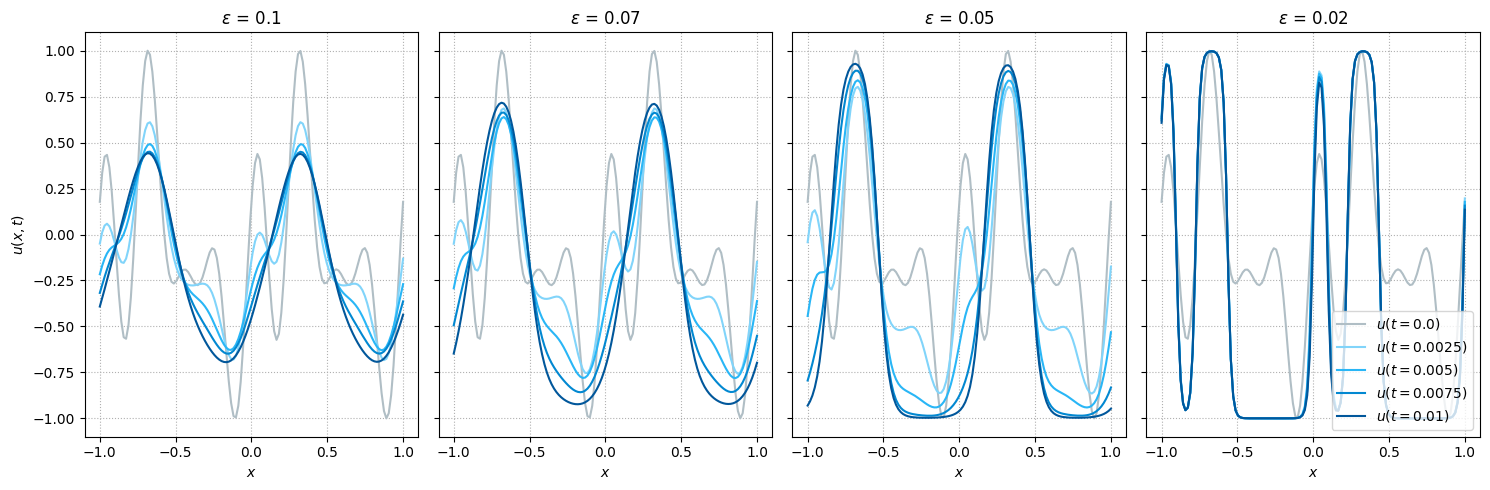

In [44]:
# autoreload
%load_ext autoreload
%autoreload 2

# imports
import matplotlib.pyplot as plt
import numpy as np
from data_processing import *
# from model import *
# from training import *


# load data
data = load_npz_data("data/training_data_standard.npz", for_exploration=True)
ic = "fourier" # gmm, piecewise, fourier
sample_id = 0
visualize_sample(data = data, ic = "fourier", sample_id = 0, set_title = False)#0 


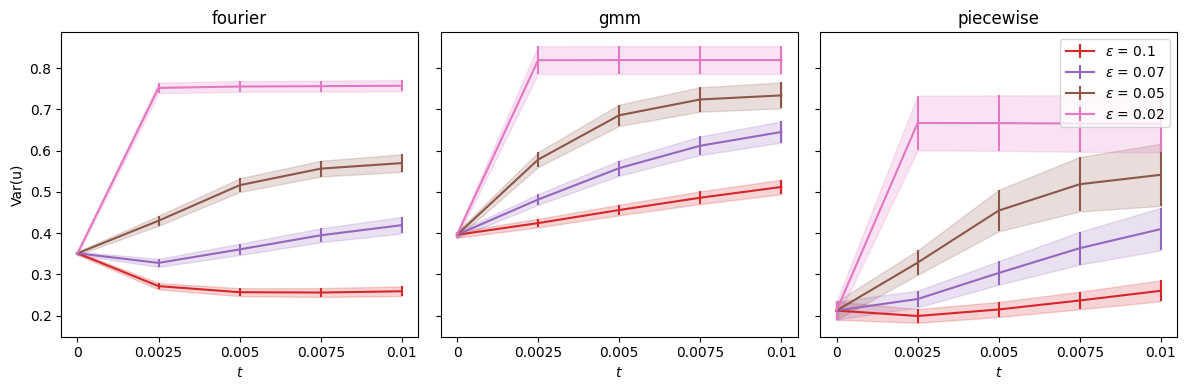

In [47]:

def compute_entropy(u, bins=10):
    hist, _ = np.histogram(u, bins=bins, density=True)
    hist = hist[hist > 0]  # Avoid log(0)
    entropy = -np.sum(hist * np.log(hist))
    return entropy

def compute_interface_length(u, dx):
    grad_u = np.gradient(u, dx)
    interface_length = np.sum(np.abs(grad_u)) * dx
    return interface_length


ic = "piecewise"
epsilons = list(data[ic].keys())
samples = data[ic][epsilons[0]].shape[0]
# epsilon = epsilons[0]

fig, axs = plt.subplots(1, 3, figsize=(12, 4), sharey=True)


for a, ic in enumerate(data.keys()):
    # store_data = ([[[compute_entropy(data[ic][epsilon][s, t, :], bins=10) for t in range(5)] for s in range(10)] for epsilon in epsilons])
    # store_data = ([[[compute_interface_length(data[ic][epsilon][s, t, :], dx=0.1) for t in range(5)] for s in range(10)] for epsilon in epsilons])
    store_data = ([[[torch.var(data[ic][epsilon][s, t, :]).item() for t in range(5)] for s in range(samples)] for epsilon in epsilons])

    store_data = np.array(store_data)
    mean, var = store_data.mean(axis=1), store_data.var(axis=1)
    store_data.shape

    # plot data with std error bars
    # print(len(mean), len(var), len(epsilons))


    for i, dat in enumerate(mean):
        # print(i)
        # plt.plot(dat, label=epsilons[i])
        axs[a].errorbar(range(5), dat, yerr=var[i]**1, label=f"$\epsilon$ = {epsilons[i]}", color = f"C{i+3}")
        axs[a].fill_between(range(5), dat-var[i], dat+var[i], alpha=0.2, color = f"C{i+3}")
        axs[a].set_xlabel("$t$")
        axs[a].set_xticks(range(5))
        axs[a].set_xticklabels([0, 0.0025, 0.005, 0.0075, 0.01])

    
    axs[a].set_title(f"{ic}")
# store_data.std(axis=1)
axs[-1].legend(loc = "upper right")
axs[0].set_ylabel("Var(u)")
# plt.suptitle("Trajectory Variance")
plt.tight_layout()
plt.show()

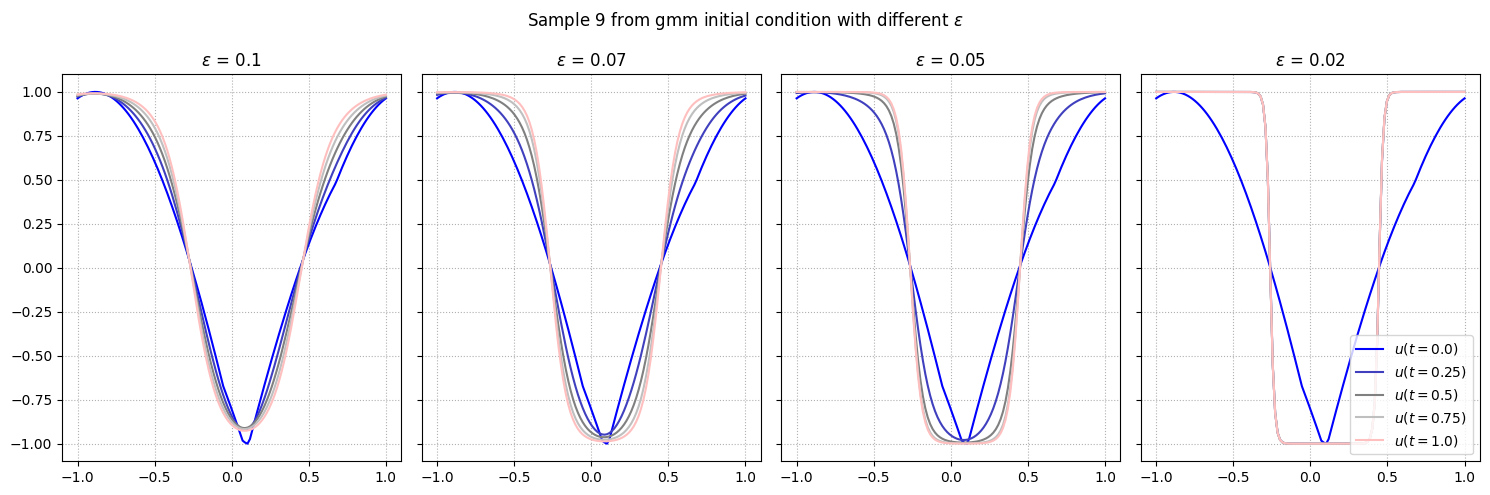

tensor([ 1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,
         1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,
         1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,
         1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,
         1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  0.9999,  0.9996,
         0.9989,  0.9969,  0.9912,  0.9746,  0.9277,  0.8006,  0.4953, -0.0418,
        -0.5532, -0.8265, -0.9375, -0.9781, -0.9924, -0.9974, -0.9991, -0.9997,
        -0.9999, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -0.9999, -0.9999, -0.9996, -0.9987, -0.9964, -0.9895,
        -0.9698, -0.9144, -0.7660, -0.4212,  0.1385,  0.6142,  0.8528,  0.9473,
         0.9816,  0.9936,  0.9978,  0.99

In [13]:
visualize_sample(data = data, ic = "gmm", sample_id = 9)
sample = data["gmm"][0.02][9, 4, :]

gradient = np.gradient(sample, 1/64)
print(sample)


In [ ]:
trained_model = AllenCahnFNO()
trained_model.load_state_dict(torch.load("models/best_model_AllenCahnFNO_lr0.001_bs32_epochs119_valloss0.002821.pt"))